In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optims
from torchsummary import summary
from model import DeepVO
from utils import *

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
weight_folder = "weights"
# weights = range(185, 205, 5)
weights = [200, 205]
optimizer = "radam"
seqs=[["0"+str(i)] if i < 10 else [str(i)] for i in range(11)]

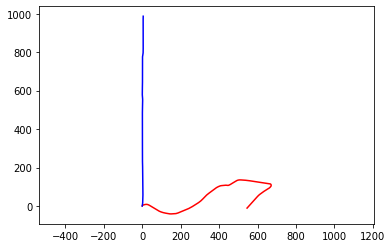

In [3]:
for weight_num in weights:
    cur, model, optimizer = load_model(device, optimizer, 0.001, f"../{weight_folder}/{weight_num}.weights")
    for seq in seqs:
        test_dl = DataLoader(KittiPredefinedDataset(seq), batch_size=16, shuffle=False, num_workers=10)
        gt, pred = test(model, test_dl, device, seq)
        draw_route(gt, pred, f"{seq[0]}_test2_{weight_num}", weight_folder)